In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import API Weather Key 
import requests
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [5]:
# Perform an API call with the OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?&units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except Exception as e:
        print(e)
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | bathsheba
Processing Record 4 of Set 1 | sitka
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | almaznyy
Processing Record 9 of Set 1 | sola
Processing Record 10 of Set 1 | porto novo
Processing Record 11 of Set 1 | kahului
Processing Record 12 of Set 1 | grand forks
Processing Record 13 of Set 1 | grahamstown
Processing Record 14 of Set 1 | amderma
'coord'
Processing Record 15 of Set 1 | suntar
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | donskoye
Processing Record 18 of Set 1 | nishihara
Processing Record 19 of Set 1 | bambous virieux
Processing Record 20 of Set 1 | faya
Processing Record 21 of Set 1 | pevek
Processing Record 22 of Set 1 | port huron
Processing Record 23 of Set 

'coord'
Processing Record 45 of Set 4 | iqaluit
Processing Record 46 of Set 4 | galesong
Processing Record 47 of Set 4 | sabang
Processing Record 48 of Set 4 | bengkulu
Processing Record 49 of Set 4 | katsuura
Processing Record 50 of Set 4 | vagur
Processing Record 1 of Set 5 | flinders
Processing Record 2 of Set 5 | armacao dos buzios
'coord'
Processing Record 3 of Set 5 | tuktoyaktuk
Processing Record 4 of Set 5 | nome
Processing Record 5 of Set 5 | edinburg
Processing Record 6 of Set 5 | orchard homes
Processing Record 7 of Set 5 | cidreira
Processing Record 8 of Set 5 | rundu
Processing Record 9 of Set 5 | makung
'coord'
Processing Record 10 of Set 5 | lagoa
Processing Record 11 of Set 5 | jijiang
Processing Record 12 of Set 5 | najran
Processing Record 13 of Set 5 | matara
Processing Record 14 of Set 5 | great yarmouth
Processing Record 15 of Set 5 | sept-iles
Processing Record 16 of Set 5 | poplar bluff
Processing Record 17 of Set 5 | oistins
Processing Record 18 of Set 5 | port 

Processing Record 39 of Set 8 | warqla
'coord'
Processing Record 40 of Set 8 | sao joao da barra
Processing Record 41 of Set 8 | pietarsaari
Processing Record 42 of Set 8 | tynda
Processing Record 43 of Set 8 | mayo
Processing Record 44 of Set 8 | necochea
Processing Record 45 of Set 8 | waynesville
Processing Record 46 of Set 8 | sawakin
Processing Record 47 of Set 8 | guerrero negro
Processing Record 48 of Set 8 | banda aceh
Processing Record 49 of Set 8 | nanfeng
Processing Record 50 of Set 8 | varkaus
Processing Record 1 of Set 9 | aden
Processing Record 2 of Set 9 | namibe
Processing Record 3 of Set 9 | viedma
Processing Record 4 of Set 9 | nouadhibou
Processing Record 5 of Set 9 | constitucion
Processing Record 6 of Set 9 | koltubanovskiy
Processing Record 7 of Set 9 | shingu
Processing Record 8 of Set 9 | palmer
Processing Record 9 of Set 9 | cotonou
Processing Record 10 of Set 9 | kautokeino
Processing Record 11 of Set 9 | chapleau
Processing Record 12 of Set 9 | lermontovka
Pr

Processing Record 35 of Set 12 | neiafu
Processing Record 36 of Set 12 | bima
Processing Record 37 of Set 12 | geraldton
Processing Record 38 of Set 12 | luau
Processing Record 39 of Set 12 | barcelona
Processing Record 40 of Set 12 | komsomolskiy
Processing Record 41 of Set 12 | katangli
Processing Record 42 of Set 12 | saint-augustin
Processing Record 43 of Set 12 | mporokoso
Processing Record 44 of Set 12 | trelaze
Processing Record 45 of Set 12 | fairbanks
Processing Record 46 of Set 12 | juneau
Processing Record 47 of Set 12 | kirakira
Processing Record 48 of Set 12 | vangaindrano
Processing Record 49 of Set 12 | coahuayana
Processing Record 50 of Set 12 | vysokogornyy
Processing Record 1 of Set 13 | dolbeau
'coord'
Processing Record 2 of Set 13 | saraipali
Processing Record 3 of Set 13 | trabzon
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint George,37.1041,-113.5841,55.44,16,0,5.01,US,2022-01-28 00:21:21
1,Punta Arenas,-53.1500,-70.9167,51.91,82,0,9.22,CL,2022-01-28 00:21:21
2,Bathsheba,13.2167,-59.5167,74.01,83,20,6.91,BB,2022-01-28 00:21:22
3,Sitka,57.0531,-135.3300,42.69,75,100,16.11,US,2022-01-28 00:21:22
4,Hermanus,-34.4187,19.2345,65.80,80,12,2.93,ZA,2022-01-28 00:21:22
5,Busselton,-33.6500,115.3333,67.05,60,0,12.35,AU,2022-01-28 00:21:23
6,Mataura,-46.1927,168.8643,66.47,30,53,1.39,NZ,2022-01-28 00:18:53
7,Almaznyy,48.0448,40.0450,12.34,98,96,3.31,RU,2022-01-28 00:21:23
8,Sola,-13.8833,167.5500,84.87,74,75,3.44,VU,2022-01-28 00:21:23
9,Porto Novo,6.4965,2.6036,80.42,86,72,3.78,BJ,2022-01-28 00:21:24


In [8]:
# Reorder the columns
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

#Assign City Data df the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint George,US,2022-01-28 00:21:21,37.1041,-113.5841,55.44,16,0,5.01
1,Punta Arenas,CL,2022-01-28 00:21:21,-53.1500,-70.9167,51.91,82,0,9.22
2,Bathsheba,BB,2022-01-28 00:21:22,13.2167,-59.5167,74.01,83,20,6.91
3,Sitka,US,2022-01-28 00:21:22,57.0531,-135.3300,42.69,75,100,16.11
4,Hermanus,ZA,2022-01-28 00:21:22,-34.4187,19.2345,65.80,80,12,2.93
...,...,...,...,...,...,...,...,...,...
544,Vangaindrano,MG,2022-01-28 00:35:19,-23.3500,47.6000,71.85,84,100,3.49
545,Coahuayana,MX,2022-01-28 00:35:19,18.7333,-103.6833,87.28,77,92,2.42
546,Vysokogornyy,RU,2022-01-28 00:35:20,50.1167,139.1500,-0.98,87,100,2.62
547,Saraipali,IN,2022-01-28 00:36:20,21.3333,83.0000,50.02,51,0,3.33


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

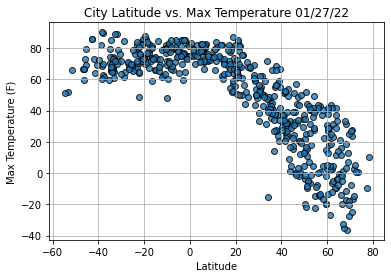

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

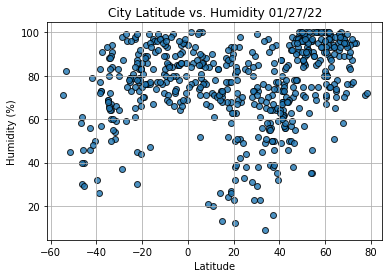

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

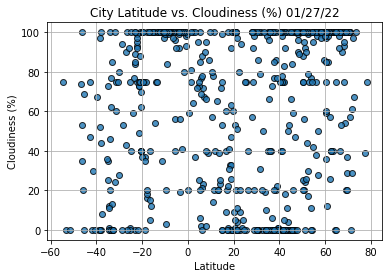

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

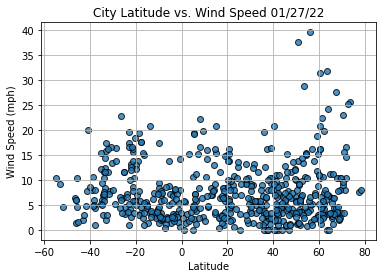

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()